In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### Exercise 1):
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
#convert to date column to to datetime type
df.date= pd.to_datetime(df.date)
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [3]:
#resample to day and mean
df = df.resample('D', on='date').mean()

In [4]:
df.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


### Exercise 2):
Write the code necessary to visualize the minimum temperature over time.

,temp,rolling_3,rolling_5,rolling_7
date,,,,
2010-01-01,49.170833,NaN,NaN,NaN
2010-01-02,49.304167,NaN,NaN,NaN
2010-01-03,49.391667,49.170833,NaN,NaN
2010-01-04,49.445833,49.304167,NaN,NaN
2010-01-05,49.491667,49.391667,49.170833,NaN
2010-01-06,49.529167,49.445833,49.304167,NaN
2010-01-07,49.466667,49.466667,49.391667,49.170833
2010-01-08,49.475000,49.466667,49.445833,49.304167
2010-01-09,49.537500,49.466667,49.466667,49.391667


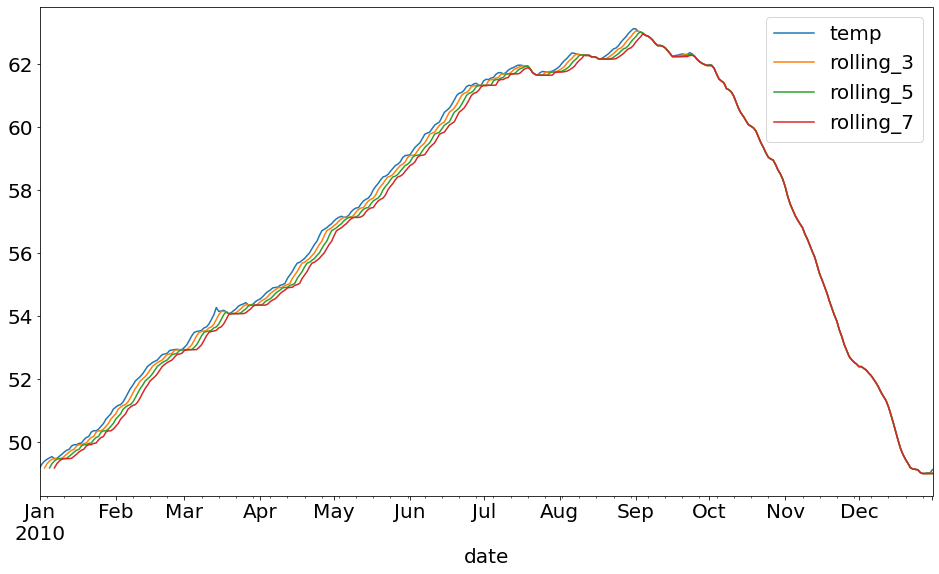

In [5]:
rolling_df = df.resample('D').mean().assign(
    rolling_3=lambda df: df.temp.rolling(3).min(),
    rolling_5=lambda df: df.temp.rolling(5).min(),
    rolling_7=lambda df: df.temp.rolling(7).min(),
)
rolling_df.plot()
rolling_df.head(20)


### Exercise 3):
Write the code necessary to visualize the maximum temperature over time.

,temp,rolling_3,rolling_5,rolling_7
date,,,,
2010-01-01,49.170833,NaN,NaN,NaN
2010-01-02,49.304167,NaN,NaN,NaN
2010-01-03,49.391667,49.391667,NaN,NaN
2010-01-04,49.445833,49.445833,NaN,NaN
2010-01-05,49.491667,49.491667,49.491667,NaN
2010-01-06,49.529167,49.529167,49.529167,NaN
2010-01-07,49.466667,49.529167,49.529167,49.529167
2010-01-08,49.475000,49.529167,49.529167,49.529167
2010-01-09,49.537500,49.537500,49.537500,49.537500


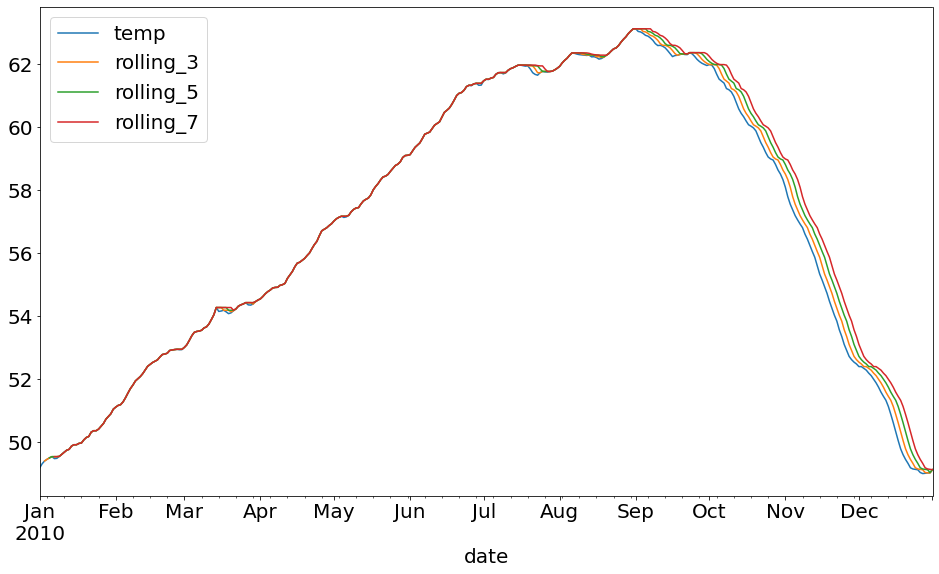

In [6]:
rolling_max = df.resample('D').mean().assign(
    rolling_3=lambda df: df.temp.rolling(3).max(),
    rolling_5=lambda df: df.temp.rolling(5).max(),
    rolling_7=lambda df: df.temp.rolling(7).max(),
)
rolling_max.plot()
rolling_max.head(20)

### Exercise 4):
Which month is the coldest, on average?

<AxesSubplot:xlabel='date'>

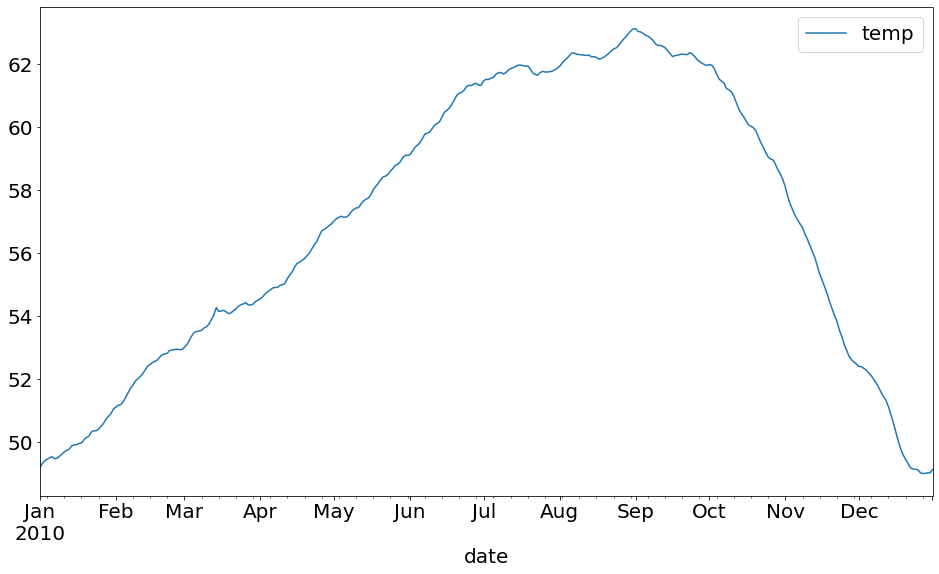

In [18]:
#plotting to visually see...January is the coldest
df.plot()

### Exercise 5):
Which month has the highest average temperature?

In [20]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=365)

### Exercise 6):
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?